In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('quantified-diet/quantified.diet.results.csv')
df.head()

,diet_randomly_assigned,diet_randomly_assigned_name,accepted_assigned_diet,overridden_diet_id,eligible_diet_glutenfree,eligible_diet_paleo,eligible_diet_sleep,eligible_diet_wholefoods,eligible_diet_slowcarb,eligible_diet_vegetarian,...,time_spent_eating_lunch_day28,would_do_diet_again_day28,would_recommend_diet_day28,n_diets_selected,n_control_diets_selected_,diet_actually_on,weight_lost_percentage_day7,weight_lost_percentage_day14,weight_lost_percentage_day21,weight_lost_percentage_day28
0,728,The Calorie Counting Diet,0,729.0,0,0,0,1,0,1,...,NaN,NaN,NaN,4,0,729,NaN,NaN,NaN,NaN
1,569,The Vegetarian Diet,1,NaN,0,0,0,0,0,1,...,NaN,NaN,NaN,1,0,569,0.000000,0.000000,-0.005917,NaN
2,586,The Whole Foods Diet,0,729.0,0,1,0,1,1,1,...,NaN,NaN,NaN,6,0,729,NaN,0.992564,NaN,NaN
3,703,Slow-Carb Diet™ from The 4-Hour Body,1,NaN,0,0,0,0,1,0,...,2.0,Yes,Yes,2,0,703,0.005865,0.002941,0.008772,0.011662
4,727,The No Sweets Diet,1,NaN,1,1,0,1,1,0,...,NaN,NaN,NaN,5,0,727,NaN,-0.009852,NaN,NaN


In [184]:
df.shape

(9128, 98)

In [185]:
# Shorten Slow Carb Diet Name Value to "Slow Carb Diet"
df['diet_randomly_assigned_name'] = df['diet_randomly_assigned_name'].str.replace('\xe2\x84\xa2 from The 4-Hour Body', '')

In [186]:
df.head()

,diet_randomly_assigned,diet_randomly_assigned_name,accepted_assigned_diet,overridden_diet_id,eligible_diet_glutenfree,eligible_diet_paleo,eligible_diet_sleep,eligible_diet_wholefoods,eligible_diet_slowcarb,eligible_diet_vegetarian,...,time_spent_eating_lunch_day28,would_do_diet_again_day28,would_recommend_diet_day28,n_diets_selected,n_control_diets_selected_,diet_actually_on,weight_lost_percentage_day7,weight_lost_percentage_day14,weight_lost_percentage_day21,weight_lost_percentage_day28
0,728,The Calorie Counting Diet,0,729.0,0,0,0,1,0,1,...,NaN,NaN,NaN,4,0,729,NaN,NaN,NaN,NaN
1,569,The Vegetarian Diet,1,NaN,0,0,0,0,0,1,...,NaN,NaN,NaN,1,0,569,0.000000,0.000000,-0.005917,NaN
2,586,The Whole Foods Diet,0,729.0,0,1,0,1,1,1,...,NaN,NaN,NaN,6,0,729,NaN,0.992564,NaN,NaN
3,703,Slow-Carb Diet,1,NaN,0,0,0,0,1,0,...,2.0,Yes,Yes,2,0,703,0.005865,0.002941,0.008772,0.011662
4,727,The No Sweets Diet,1,NaN,1,1,0,1,1,0,...,NaN,NaN,NaN,5,0,727,NaN,-0.009852,NaN,NaN


In [187]:
list(df.columns.values)

['diet_randomly_assigned',
 'diet_randomly_assigned_name',
 'accepted_assigned_diet',
 'overridden_diet_id',
 'eligible_diet_glutenfree',
 'eligible_diet_paleo',
 'eligible_diet_sleep',
 'eligible_diet_wholefoods',
 'eligible_diet_slowcarb',
 'eligible_diet_vegetarian',
 'eligible_diet_caloriecounting',
 'eligible_diet_dash',
 'eligible_diet_reading',
 'eligible_diet_floss',
 'eligible_diet_mindfuleating',
 'eligible_diet_nosweets',
 'gender_day0',
 'energy_level_day0',
 'who_live_with_day0',
 'diet_include_meat_day0',
 'diet_include_dairy_day0',
 'diet_include_eggs_day0',
 'diet_include_grains_day0',
 'diet_include_candy_day0',
 'diet_incude_soda_day0',
 'diet_include_vegetables_day0',
 'diet_includes_homecooked_day0',
 'diet_include_ffood_day0',
 'reasons_joined_weight_day0',
 'reasons_joined_health_day0',
 'reasons_joined_energy_day0',
 'reasons_joined_science_day0',
 'confidence_day0',
 'energy_level_day7',
 'confidence_day7',
 'energy_level_day14',
 'diet_adherence_frequency_day14

In [188]:
# Show only those who completed study
df_completed_study = df.dropna(subset=["weight_lost_percentage_day7", "weight_lost_percentage_day14", "weight_lost_percentage_day21","weight_lost_percentage_day28"])

In [189]:
df_completed_study.shape

(760, 98)

In [190]:
df_completed_study['diet_randomly_assigned_name'] = df_completed_study['diet_randomly_assigned_name'].str.replace('The ', '')

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [191]:
# Find Inputs for Dictionary
df_completed_study.groupby(['diet_randomly_assigned', 'diet_randomly_assigned_name']).size()

diet_randomly_assigned  diet_randomly_assigned_name
569                     Vegetarian Diet                 49
586                     Whole Foods Diet                61
703                     Slow-Carb Diet                 209
722                     Paleo Diet                     106
723                     DASH Diet                       16
725                     Sleep Diet                      39
726                     Gluten-Free Diet                39
727                     No Sweets Diet                  61
728                     Calorie Counting Diet           59
729                     Mindful Eating Diet             64
227208                  Reading Diet                    34
227209                  Flossing Diet                   23
dtype: int64

In [192]:
# Create Dictionary
code_names_dict = {569: 'Vegetarian Diet', 
                   586: 'Whole Foods Diet', 
                   703: 'Slow-Carb Diet', 
                   722: 'Paleo Diet', 
                   723: 'DASH Diet', 
                   725: 'Sleep Diet', 
                   726: 'Gluten-Free Diet', 
                   727: 'No Sweets Diet', 
                   728: 'Calorie Counting Diet', 
                   729: 'Mindful Eating Diet', 
                   227208: 'Reading Diet', 
                   227209: 'Flossing Diet'
                  }

In [193]:
np.unique(df_completed_study[['diet_randomly_assigned', 'diet_randomly_assigned_name']].values)

array([569, 586, 703, 722, 723, 725, 726, 727, 728, 729, 227208, 227209,
       'Calorie Counting Diet', 'DASH Diet', 'Flossing Diet',
       'Gluten-Free Diet', 'Mindful Eating Diet', 'No Sweets Diet',
       'Paleo Diet', 'Reading Diet', 'Sleep Diet', 'Slow-Carb Diet',
       'Vegetarian Diet', 'Whole Foods Diet'], dtype=object)

In [194]:
# Replace Code Values with Names of Diets
df_completed_study = df_completed_study.replace(to_replace=dict({'diet_actually_on':code_names_dict, 'overridden_diet_id': code_names_dict}))


## Diets Sorted By Mean Weight Lost

In [195]:
avg_weight_lost = df_completed_study.groupby('diet_actually_on')['weight_lost_percentage_day28'].mean()
avg_weight_lost.sort_values()

diet_actually_on
Sleep Diet              -0.125865
No Sweets Diet          -0.086508
Mindful Eating Diet     -0.075249
Flossing Diet           -0.064088
Slow-Carb Diet          -0.063912
Paleo Diet              -0.031212
DASH Diet               -0.020084
Calorie Counting Diet   -0.017454
Gluten-Free Diet        -0.014786
Vegetarian Diet         -0.014521
Whole Foods Diet        -0.006232
Reading Diet            -0.005397
Name: weight_lost_percentage_day28, dtype: float64

In [196]:
diet_properties_list = [
    'diet_adherence_frequency_day28',
    'meat_freq_day28',
    'nuts_freq_day28',
    'pasta_freq_day28',
    'legumes_freq_day28',
    'vegetables_freq_day28',
    'fruits_freq_day28',
    'dairy_freq_day28',
    'eggs_freq_day28',
    'sweets_freq_day28',
    'processed_foods_freq_day28',
    'ate_regularly_breakfast_day28',
    'ate_regularly_lunch_day28',
    'ate_regularly_dinner_day28',
    'ate_regularly_snack_day28',
    'ate_regularly_dessert_day28',
    'hours_sleep_regularly_day28',
    'exercise_frequency_day28',
    'exercise_relative_to_norm_day28',
    'kept_track_of_food_day28',
    'restricted_portions_day28',
    'counted_calories_day28'
]

In [197]:
property_dict = {}

for property_name in diet_properties_list:
#   Mean of weight loss is multiplied by -1 to show weight lost as a positive number and weight gain as negative for the charts.
    avg_weight_lost = df_completed_study.groupby(property_name)['weight_lost_percentage_day28'].mean()*-1
    property_dict[property_name] = avg_weight_lost

# Create Images Plotting Different Eating Habits

In [198]:
for property_name in property_dict:
    chart = property_dict[property_name].plot(kind='bar', figsize=(9.0, 7.0), title=property_name)
    chart.set_xlabel("")
#     ADD chart.text here: https://python-graph-gallery.com/10-barplot-with-number-of-observation/
#     allows frequency of each answer to property to be shown above bars.
    image = chart.get_figure()
    image.tight_layout()
    image.savefig("./quantified-diet/charts/" + property_name)
    image.clf()

<Figure size 648x504 with 0 Axes>

### Positive numbers show weight loss on charts.

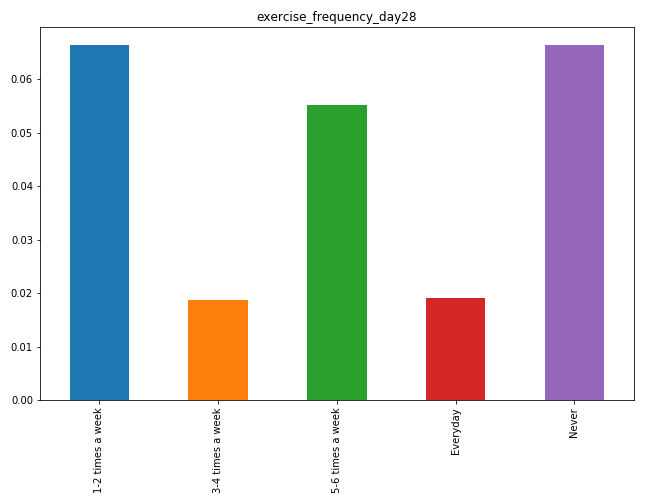

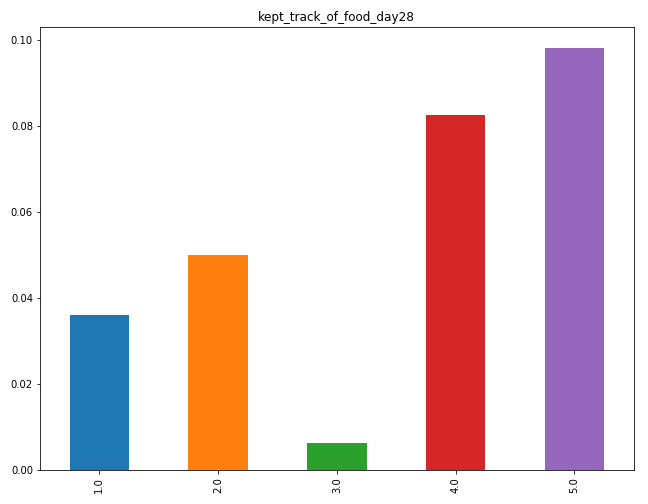

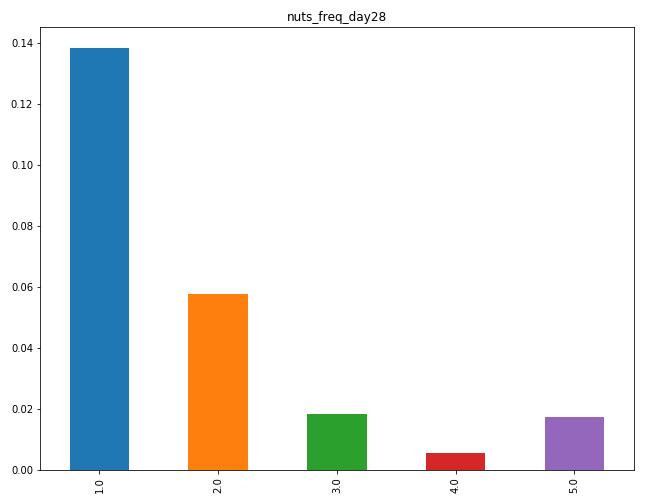

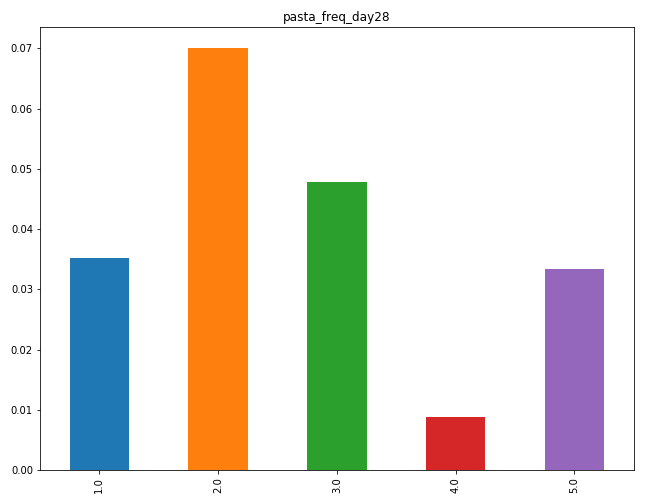

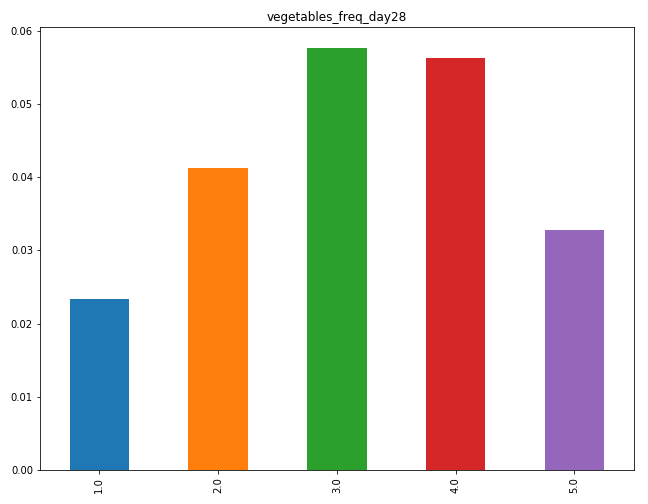

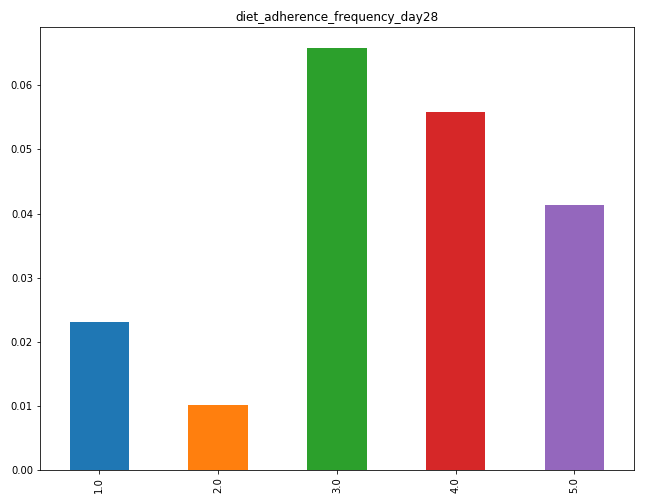

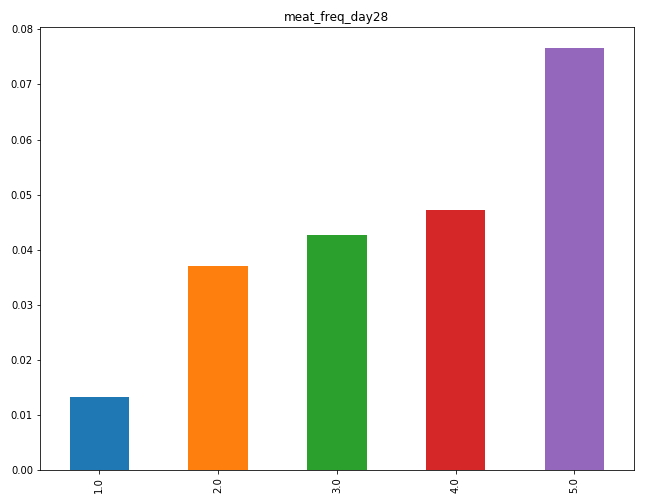

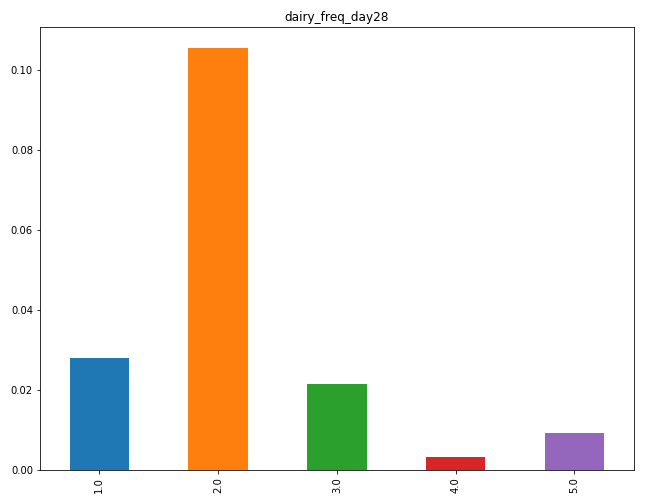

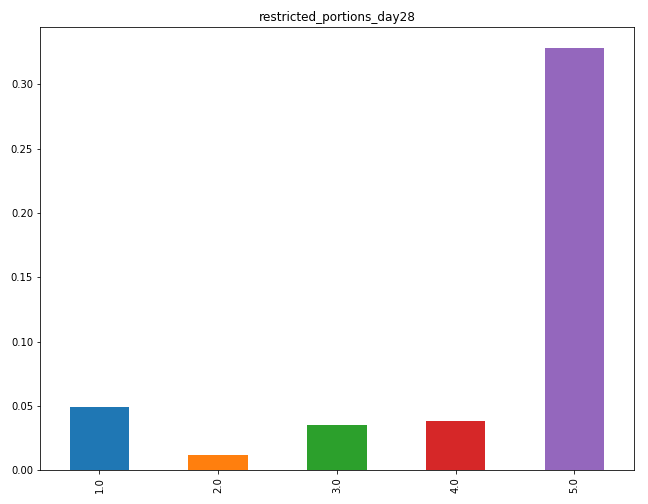

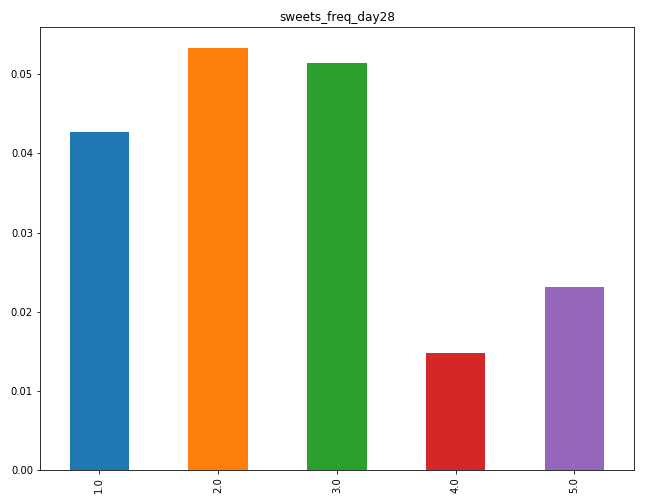

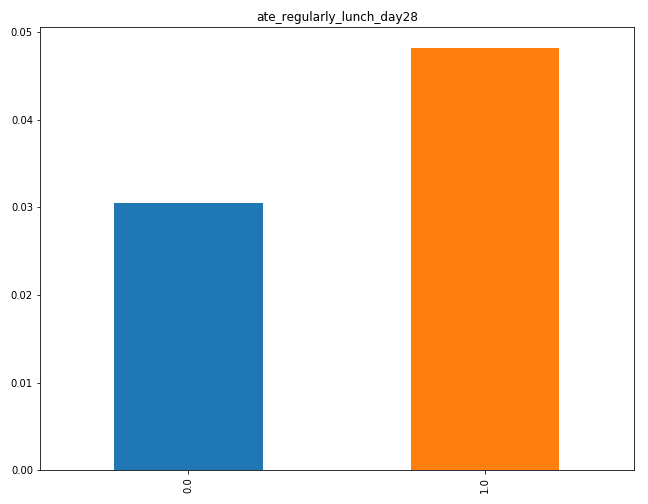

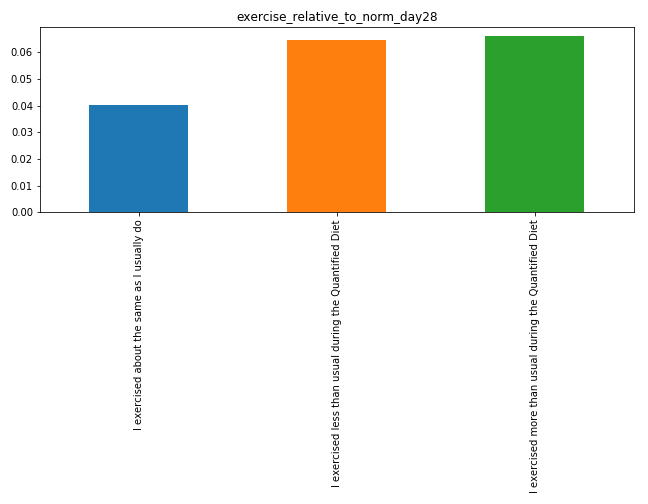

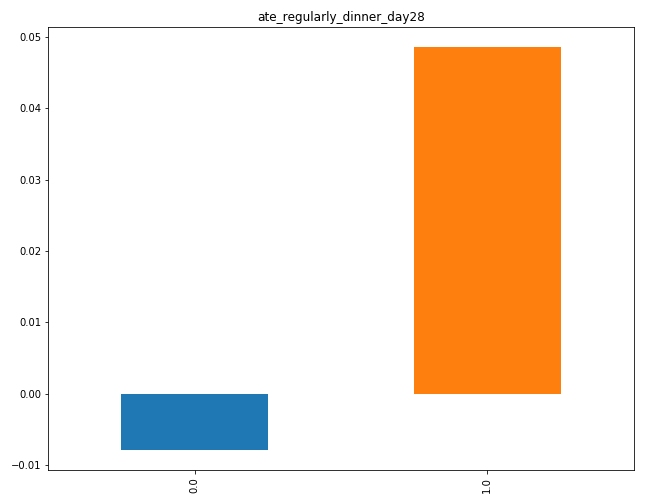

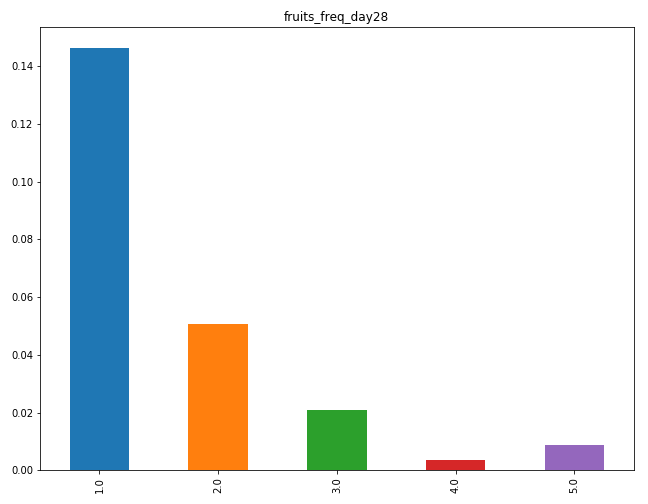

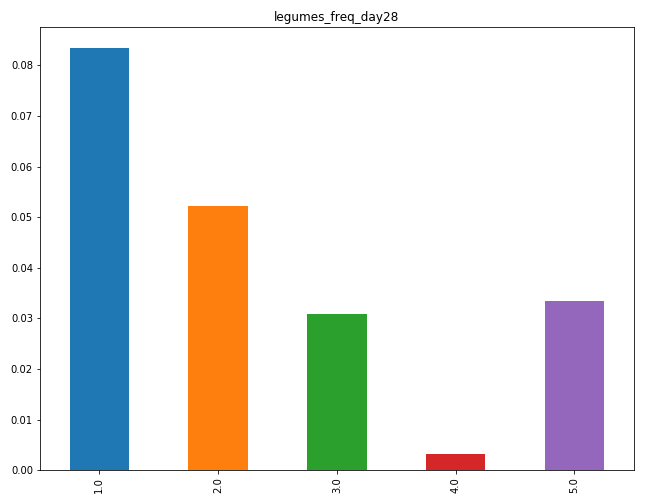

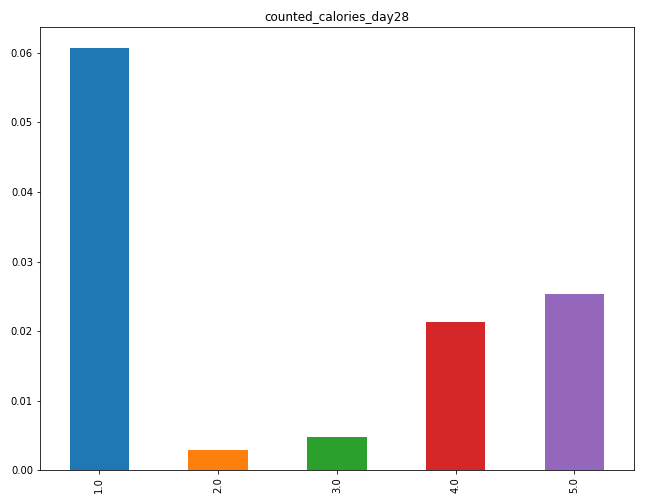

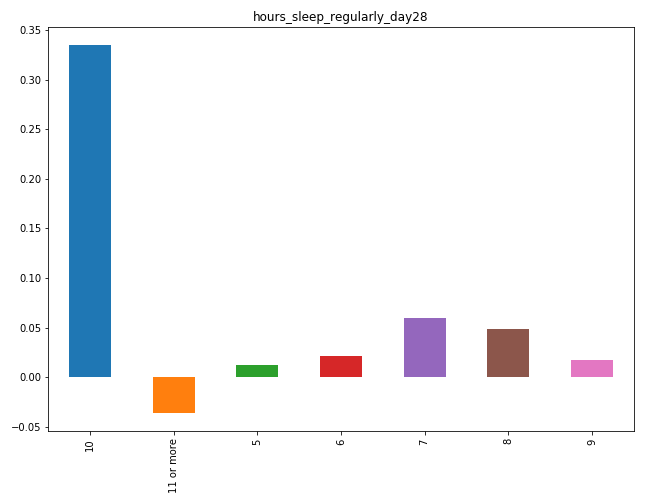

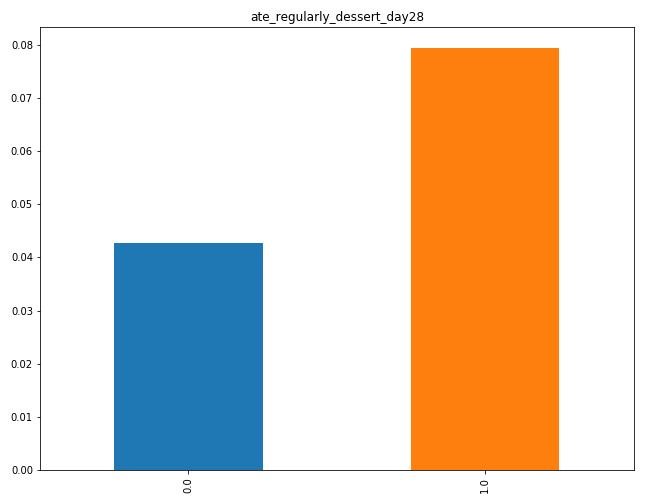

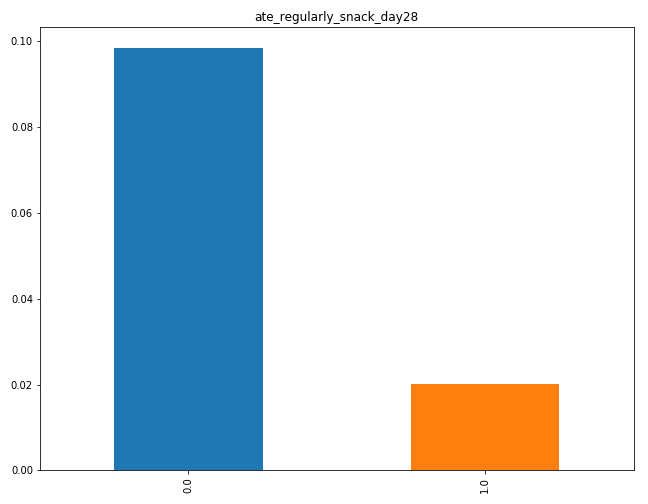

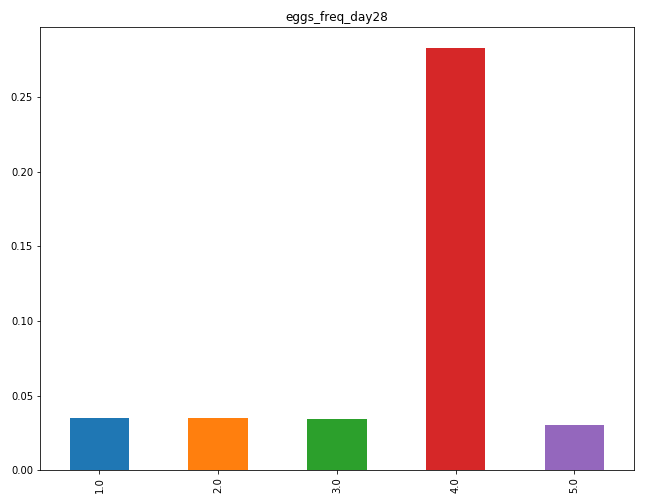

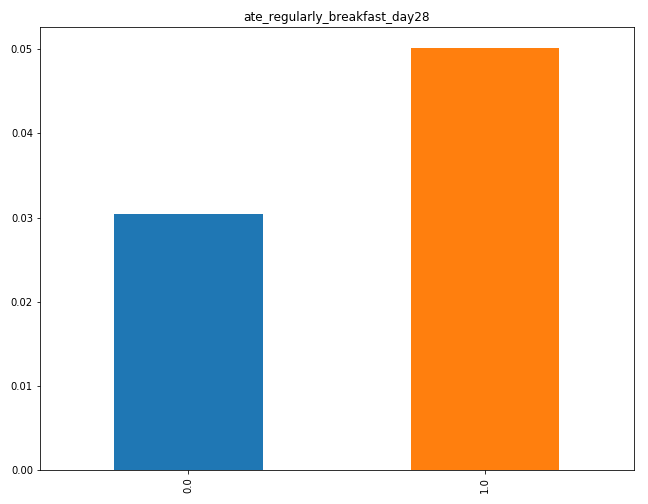

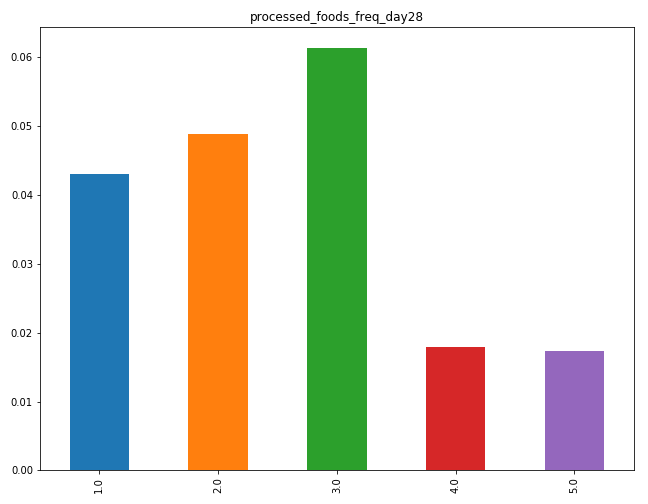

In [199]:
# collect all .png files in working dir
fs = !find ./quantified-diet/charts -name "*.png"

import IPython.display as dp

# create list of image objects
images = []
for ea in fs:
    images.append(dp.Image(filename=ea, format='png'))

# display all images
for ea in images:
    dp.display_png(ea)

## Sample Size of Each Group

In [200]:
for property_name in diet_properties_list:
    property_value_count = df_completed_study[property_name].value_counts()
    print(property_value_count)

4.0    316
5.0    251
3.0    100
2.0     55
1.0     38
Name: diet_adherence_frequency_day28, dtype: int64
4.0    211
3.0    199
5.0    172
1.0     93
2.0     85
Name: meat_freq_day28, dtype: int64
2.0    287
3.0    272
1.0     99
4.0     95
5.0      7
Name: nuts_freq_day28, dtype: int64
2.0    274
1.0    194
3.0    167
4.0     88
5.0     37
Name: pasta_freq_day28, dtype: int64
2.0    278
3.0    229
1.0    157
4.0     61
5.0     35
Name: legumes_freq_day28, dtype: int64
4.0    287
5.0    263
3.0    165
2.0     39
1.0      6
Name: vegetables_freq_day28, dtype: int64
3.0    208
2.0    193
4.0    171
1.0    143
5.0     38
Name: fruits_freq_day28, dtype: int64
2.0    253
3.0    240
1.0    126
4.0    122
5.0     19
Name: dairy_freq_day28, dtype: int64
3.0    347
2.0    281
1.0     91
4.0     39
5.0      2
Name: eggs_freq_day28, dtype: int64
2.0    332
1.0    192
3.0    182
4.0     48
5.0      3
Name: sweets_freq_day28, dtype: int64
2.0    369
1.0    218
3.0    127
4.0     40
5.0      6
Name: